# ------------------ '(Diabetes prediction)' ---------------------
### data link : "https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data"
# Project steps 
### 1) Understanding Data 
* a- Understand Columns
* b- check dtype 
* c- Describe Numerical Cols
* d- Describe Categorical Cols
* e- Catching any error
### 2) Data Cleaning "Handling any error" 
### 3) EXTRACT FEATURES + EDA ("Univariate Analysis" , "Bivariate Analysis") 
### 4) Pre-Processing Mind Map:
* a- Detect & Handle Duplicates
* b- train_test_split
* c- Detect & Handle NaNs
* d- Detect & Handle Outliers
* e- Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f- Imbalanced: X_train_resampled
* g- Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

#### 5) Modeling

* 1) Simple Model & Evaluate it's Performance
* 2) Bias vs Variance (Underfitting vs Overfitting)
* 3) GridSearch
* 4) Test Perforamnce
* 5) Save Model

In [1]:
# 📦 Data analysis and visualization libraries
import pandas as pd                            # For data loading and manipulation
import numpy as np                             # For numerical computations
import matplotlib.pyplot as plt                # For basic plotting
import seaborn as sns                          # For statistical plots
import plotly.express as px                    # For quick interactive plots
from plotly.subplots import make_subplots      # For subplotting in Plotly

# 🧹 Data preprocessing and cleaning
from datasist.structdata import detect_outliers        # To detect outliers in data
from sklearn.impute import SimpleImputer              # For missing value imputation (simple methods)
from sklearn.impute import KNNImputer                 # For missing value imputation (KNN-based)
from sklearn.preprocessing import RobustScaler        # For scaling features robust to outliers
from sklearn.preprocessing import OneHotEncoder       # For encoding categorical features
from sklearn.compose import ColumnTransformer         # For applying transformers to specific columns

# ⚖️ Handling imbalanced data
from imblearn.over_sampling import SMOTE              # For oversampling minority class
from imblearn.under_sampling import RandomUnderSampler  # For undersampling majority class
from imblearn.pipeline import Pipeline                # Pipeline supporting sampling steps

# 🧪 Data splitting and cross-validation
from sklearn.model_selection import train_test_split      # For splitting data into train and test sets
from sklearn.model_selection import StratifiedKFold       # For stratified K-Fold cross-validation
from sklearn.model_selection import cross_val_score, cross_val_predict  # For cross-validation

# 🧮 Classification models
from sklearn.linear_model import LogisticRegression       # Logistic Regression model
from sklearn.svm import SVC                               # Support Vector Machine model
from sklearn.neighbors import KNeighborsClassifier        # K-Nearest Neighbors model
from sklearn.tree import DecisionTreeClassifier           # Decision Tree model
from sklearn.ensemble import RandomForestClassifier       # Random Forest model
from sklearn.ensemble import GradientBoostingClassifier   # Gradient Boosting model
from sklearn.ensemble import HistGradientBoostingClassifier  # Fast version of Gradient Boosting
from xgboost import XGBClassifier                         # XGBoost model
from catboost import CatBoostClassifier                   # CatBoost model

# 🔍 Model evaluation and tuning
from sklearn.model_selection import GridSearchCV          # For hyperparameter tuning
from sklearn.metrics import accuracy_score                # For calculating accuracy
from sklearn.metrics import classification_report         # For detailed classification performance
from sklearn.metrics import confusion_matrix              # For generating confusion matrix

# 💾 Saving and loading models
import joblib    

### 1) Understanding Data 
* a- Understand Columns
* b- check dtype 
* c- Describe Numerical Cols
* d- Describe Categorical Cols
* e- Catching any error

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0


In [67]:
# a- Understand Columns

# gender => The person's gender
# age => The person's age
# hypertension => If the person has high blood pressure. 0 means No - 1 means Yes
# heart_disease => If the person has any heart disease. 0 means No - 1 means Yes
# smoking_history=> Shows if the person has smoked before or still smokes.
        # 1- "current" = بيدخن حاليًا
        # 2- "not current" = بطل التدخين من قريب
        # 3- "former" = بطل التدخين من زمان
        # 4- "ever" = دخن في أي وقت (سواء بيدخن دلوقتي أو بطل)
        # 5- "never" = عمره ما دخن
        # 6- "No Info" = مفيش بيانات


# bmi => The person's Body Mass Index .
# HbA1c_level => The person's HbA1c level.
# blood_glucose_level => The person's blood sugar level at the moment.
# diabetes => If the person has diabetes.

In [68]:
# b- check dtype 
df.info()
# i don't have null 
# Dtypes are true 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [69]:
# c- Describe Numerical Cols
df.select_dtypes("number").describe()
# age min = 0.080000 ??? 
# diabetes mean = 0.085000 ??? data imbalance 
# bim min = 10 and amx = 95 and std = 6 and 50% = 27 i have outlire

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [70]:
# d- Describe Categorical Cols

for colum in list(df.select_dtypes("object").columns): 
    print(colum ," -->> ",df[colum].unique().tolist())
    print(colum ," -->> ",df[colum].value_counts(normalize=True ).to_dict())
    ps = 0
    for i in df[colum].value_counts(normalize=True ).to_dict().values():
        ps+=i
    print(ps)
    print("_"*40)

# 'No Info': 0.35816 ? 
# ever and never  -> smoking_history  

gender  -->>  ['Female', 'Male', 'Other']
gender  -->>  {'Female': 0.58552, 'Male': 0.4143, 'Other': 0.00018}
1.0
________________________________________
smoking_history  -->>  ['never', 'No Info', 'current', 'former', 'ever', 'not current']
smoking_history  -->>  {'No Info': 0.35816, 'never': 0.35095, 'former': 0.09352, 'current': 0.09286, 'not current': 0.06447, 'ever': 0.04004}
0.9999999999999999
________________________________________


<Axes: xlabel='bmi', ylabel='Count'>

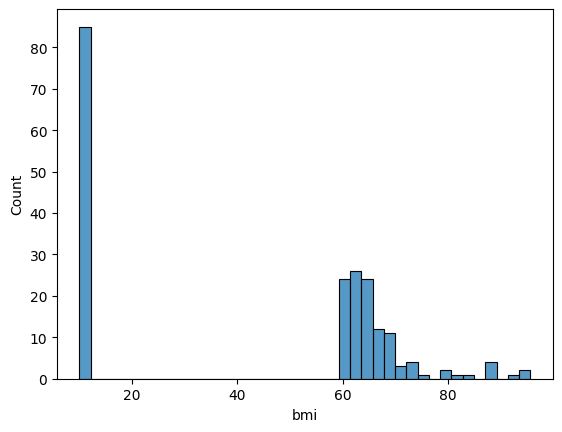

In [71]:
# e- Catching any error

# 1 - bim min = 10 and amx = 95 and std = 6 and 50% = 27 i have outlire

# df[(df["bmi"] <= 12) | (df["bmi"] >= 60)].shape[0]  / df.shape[0] = 0.00201

sns.histplot(data=df[(df["bmi"] <= 12) | (df["bmi"] >= 60)] , 
            x= "bmi" ,
            bins=40)

<Axes: xlabel='age', ylabel='Density'>

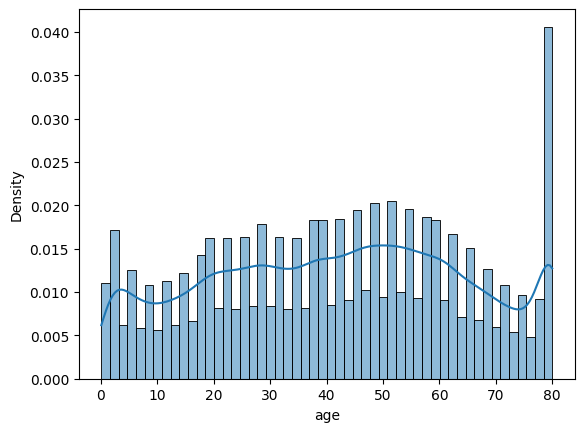

In [72]:
# age min = 0.080000 ??? 

sns.histplot(data=df , x="age" , stat="density" , kde=True)


In [73]:
df[df["age"] <= 15]["smoking_history"].value_counts()

No Info        12107
never           2592
not current      418
current           50
ever               6
former             6
Name: smoking_history, dtype: int64

## 2) Data Cleaning "Handling any error" 

In [3]:
# It removes all rows where the BMI is less than or equal to  or greater than or equal  70.
# These values are considered unrealistic or outliers

df.drop(index= df[(df["bmi"] <= 10) | (df["bmi"] >= 70)].index , inplace=True )
df.reset_index(drop=True , inplace=True)

In [4]:
# set the value to "never" for all rows where the person's age is 15 years old or younger,
# assuming that children at that age do not smoke.
df.loc[df["age"] <= 15 , "smoking_history" ] = "never"  


## 3) EXTRACT FEATURES + EDA ("Univariate Analysis" , "Bivariate Analysis") 

### a) EXTRACT FEATURES

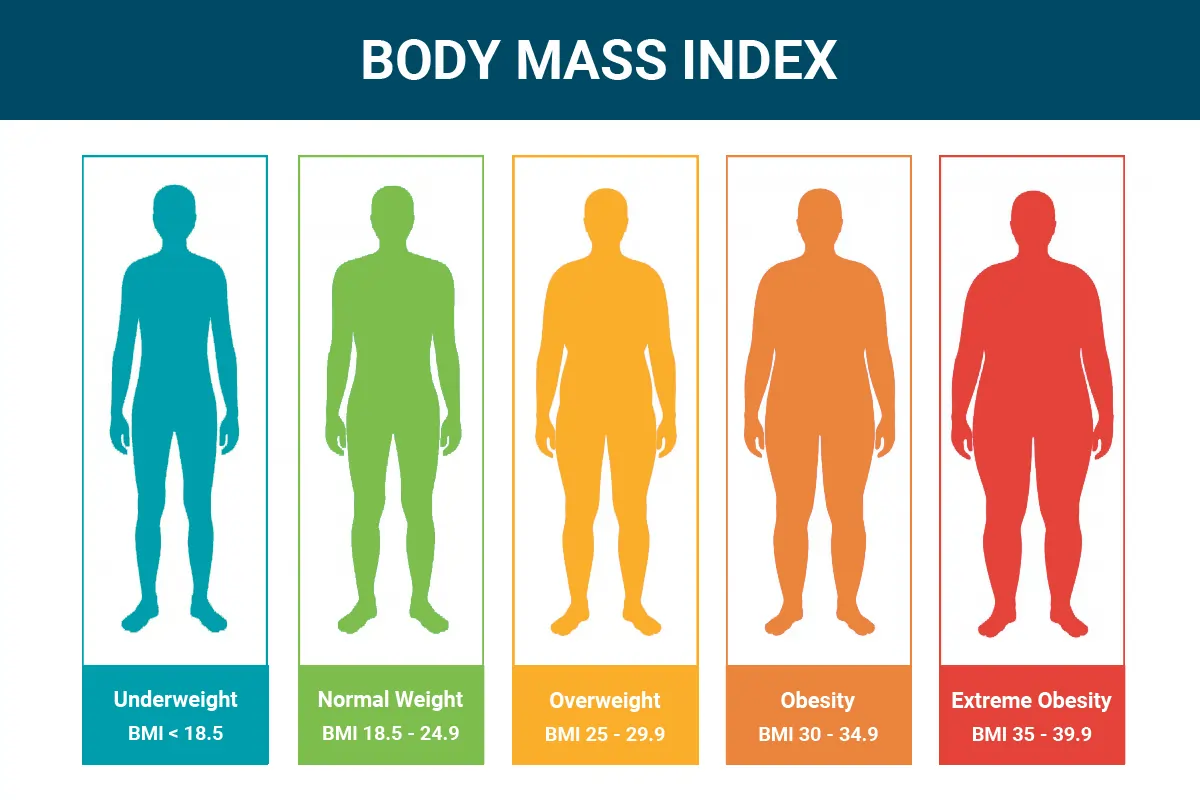

In [5]:
# "is_fat" 
# If the BMI is 25 or higher, the function returns 1 (meaning the person is considered fat).
# Otherwise, it returns 0 (meaning the person is not fat).

def is_the_person_fat(bmi):
    
    if bmi >= 25 :
        return 1 
    else :
        return 0
df["is_fat"] = df["bmi"].apply(is_the_person_fat)

In [6]:
# df["smoking_history"].unique() = ['never', 'No Info', 'current', 'former', 'ever', 'not current']

smoking_risk_map = {
    "never": 0,
    "former": 1,
    "not current": 2,
    "ever": 3,
    "current": 4,
    "No Info": np.nan # I will replace No Info
}
df["smoking_risk_level"] = df["smoking_history"].map(smoking_risk_map)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,is_fat,smoking_risk_level
0,Female,80.0,0,1,never,25.19,6.6,140,0,1,0.0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,1,NaN
2,Male,28.0,0,0,never,27.32,5.7,158,0,1,0.0
3,Female,36.0,0,0,current,23.45,5.0,155,0,0,4.0
4,Male,76.0,1,1,current,20.14,4.8,155,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
99976,Female,80.0,0,0,No Info,27.32,6.2,90,0,1,NaN
99977,Female,2.0,0,0,never,17.37,6.5,100,0,0,0.0
99978,Male,66.0,0,0,former,27.83,5.7,155,0,1,1.0
99979,Female,24.0,0,0,never,35.42,4.0,100,0,1,0.0


In [7]:
imputer = KNNImputer(n_neighbors=5) # imputer for fill no info data 

df_for_imputation = df.drop(columns=["gender" , "smoking_history"]) # Prepare dataframe without categorical column


In [8]:
import random
index_to_evaluate = random.sample( list(df_for_imputation.dropna(axis=0).index), 1000 ) # Choose random index for evaluation

df_evaluate = df_for_imputation.iloc[index_to_evaluate].copy() # Take Rowse from those index

df_evaluate_smoking_risk_level = df_evaluate["smoking_risk_level"].copy() # # Take the target colam from evaluate df 

df_evaluate["smoking_risk_level"] = np.nan # replace the values with nan


In [9]:
imputed_array = imputer.fit_transform(df_for_imputation) # fill the nan values in the data

df_imputed = pd.DataFrame(imputed_array, columns=df_for_imputation.columns) # make the rezalt as df

df = pd.concat([df[["gender", "smoking_history"]].reset_index(drop=True),
                      df_imputed.reset_index(drop=True)], axis=1) # concat the categorical column with the df

df["smoking_risk_level"] = df["smoking_risk_level"].astype("int") # cange the type to be int 

df.head(3) # show first three rowes 

,gender,smoking_history,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,is_fat,smoking_risk_level
0,Female,never,80.0,0.0,1.0,25.19,6.6,140.0,0.0,1.0,0
1,Female,No Info,54.0,0.0,0.0,27.32,6.6,80.0,0.0,1.0,1
2,Male,never,28.0,0.0,0.0,27.32,5.7,158.0,0.0,1.0,0


In [10]:
smoking_risk_level_predict = pd.DataFrame(imputer.transform(df_evaluate), columns=df_for_imputation.columns)["smoking_risk_level"] 
# make the imputer fill the nan and save the rezalt for evaluate

acc = accuracy_score(df_evaluate_smoking_risk_level, smoking_risk_level_predict.astype("int")) # Calculate the accuracy From the production and the true
print(f"Accuracy: {acc}")

# 0.56 it is not that bad 

Accuracy: 0.51


In [11]:
reverse_map = {
    0: "never",
    1: "former",
    2: "not current",
    3: "ever",
    4: "current"
}
df["smoking_history"] = df["smoking_risk_level"].map(reverse_map) # Apply the result on the column


In [83]:
df["smoking_risk_level"].value_counts()

0    57189
1    19987
2     9261
4     9243
3     4301
Name: smoking_risk_level, dtype: int64

In [84]:
df["smoking_history"].value_counts()

never          57189
former         19987
not current     9261
current         9243
ever            4301
Name: smoking_history, dtype: int64

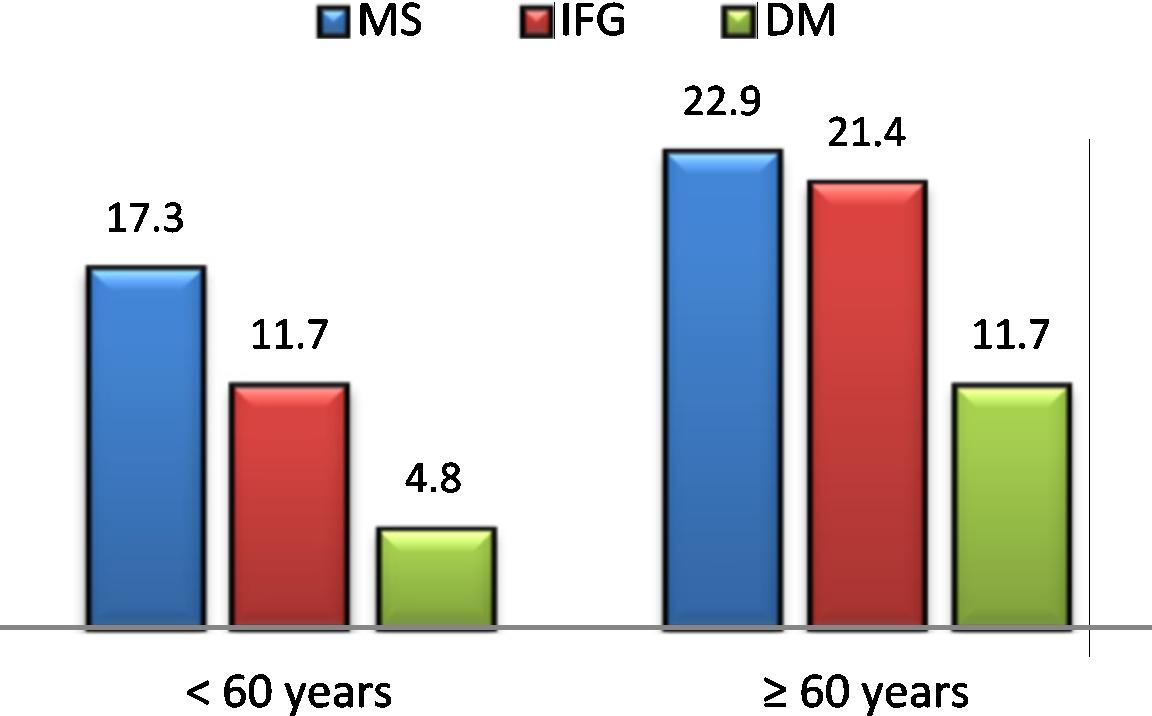

In [12]:
# (MS) Metabolic Syndrome - (IFG) Impaired Fasting Glucose - (DM) Diabetes Mellitus

# risk_age
# Older people are more susceptible to this disease.
# If the age is 60 or older, it returns 1 .
# Otherwise, it returns 0.



def is_high_risk_age (age):
    if age >= 60 :
        return 1
    else :
        return 0


df["risk_age"] = df["age"].apply(is_high_risk_age)

In [13]:
# glucose_risk_level
# that categorizes blood glucose levels into three risk levels:
# 0 → Normal blood sugar (≤ 140)
# 1 → Prediabetes (between 141 and 199)
# 2 → Diabetes (≥ 200 )

def is_high_risk_glucose(blood_glucose_level):
    if blood_glucose_level <= 140:
        return 0
    elif blood_glucose_level <= 199:
        return 1
    else :
        return 2

df["glucose_risk_level"] = df["blood_glucose_level"].apply(is_high_risk_glucose)

In [14]:
# that categorizes a person's HbA1c level into 4 risk levels:
# 0 → Normal (HbA1c < 5.7%)
# 1 → Slightly Elevated (5.7 ≤ HbA1c < 6%)
# 2 → Prediabetes (6% ≤ HbA1c < 6.5%)
# 3 → Diabetes (HbA1c ≥ 6.5%)

def hba1c_risk(val):
    if val < 5.7:
        return 0
    elif val < 6:
        return 1
    elif val < 6.5:
        return 2
    else:
        return 3

df["hba1c_risk_score"] = df["HbA1c_level"].apply(hba1c_risk)

In [15]:
# that calculates a composite risk score for each person by adding values from several health related columns .


def risk_score(row):
    score = (
        row["hypertension"]
        + row["heart_disease"]
        + row["is_fat"]
        + row["smoking_risk_level"]
        + row["risk_age"]
        + row["glucose_risk_level"]
        + row["hba1c_risk_score"]
    )
    return score

df["risk_score"] = df.apply(risk_score, axis=1)

In [16]:
# Change the type of binary column from float to integer
df[["hypertension" ,"heart_disease",
    "diabetes","is_fat","smoking_risk_level"
    ,"risk_age","glucose_risk_level",
    "hba1c_risk_score","risk_score"]] = df[["hypertension" ,"heart_disease","diabetes","is_fat",
                                            "smoking_risk_level","risk_age","glucose_risk_level",
                                            "hba1c_risk_score","risk_score"]].astype("int")

### B) EDA ("Univariate Analysis" , "Bivariate Analysis") 

### 1- Univariate Analysis

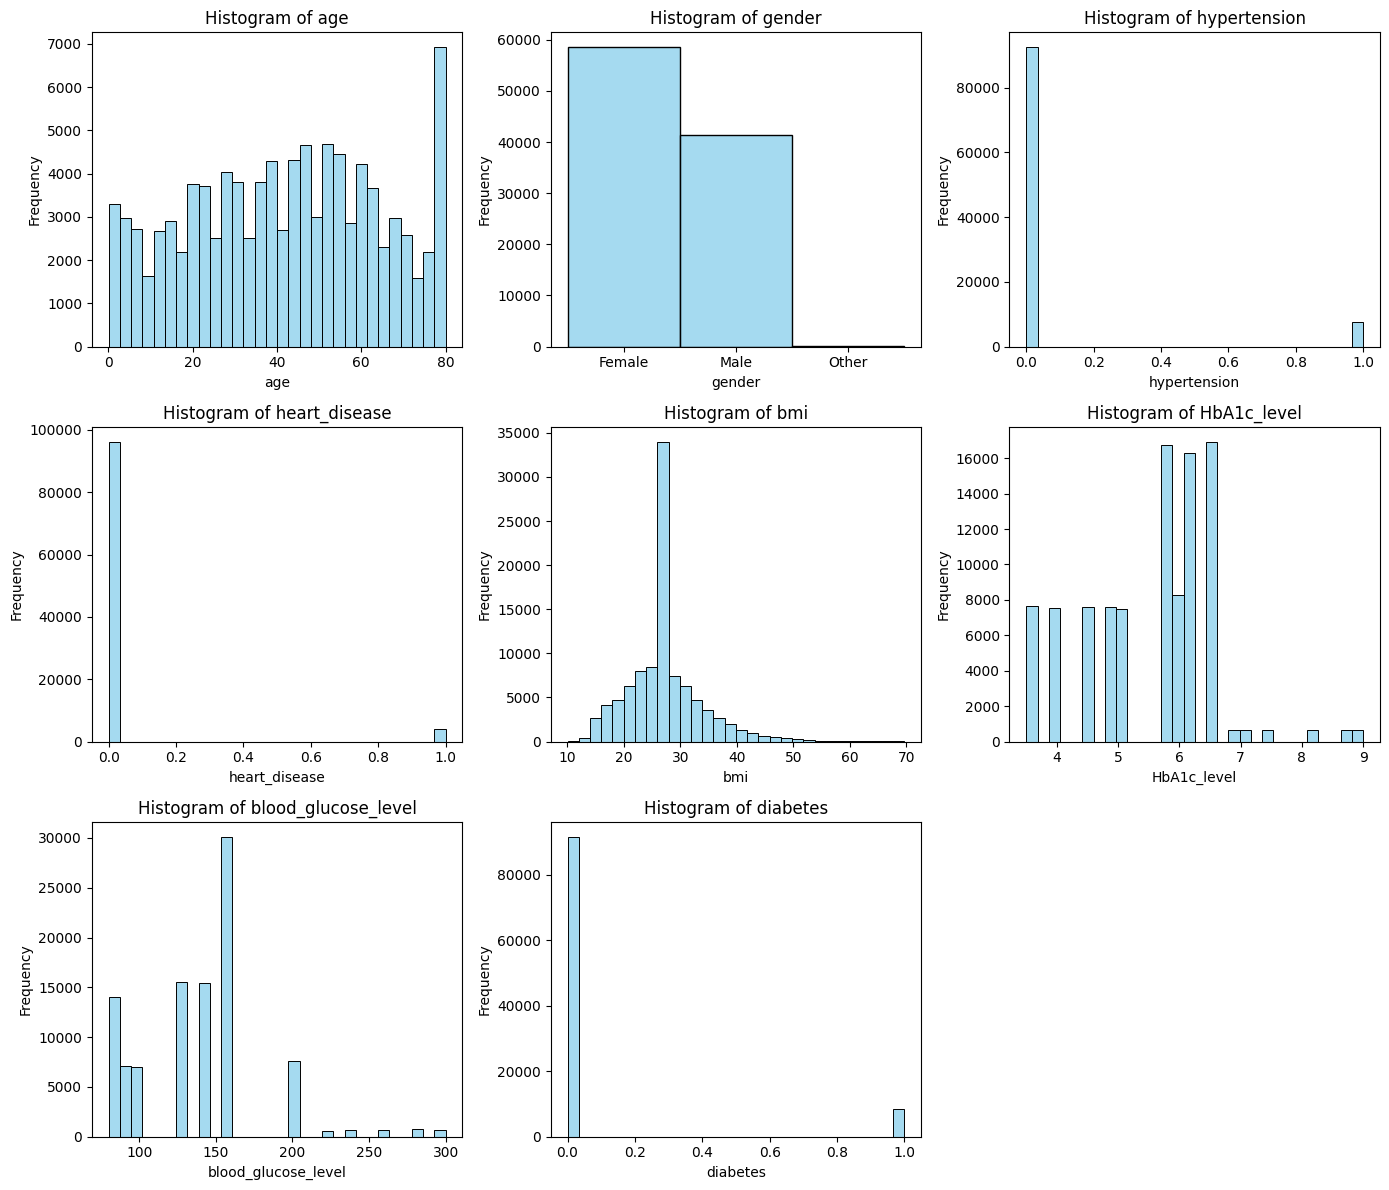

In [90]:
numeric_columns = ['age','gender' ,'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


plt.figure(figsize=(14, 12))


for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i) 
    sns.histplot(df[column], bins=30, color='skyblue' , stat="count")  
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

### 2- Bivariate Analysis 

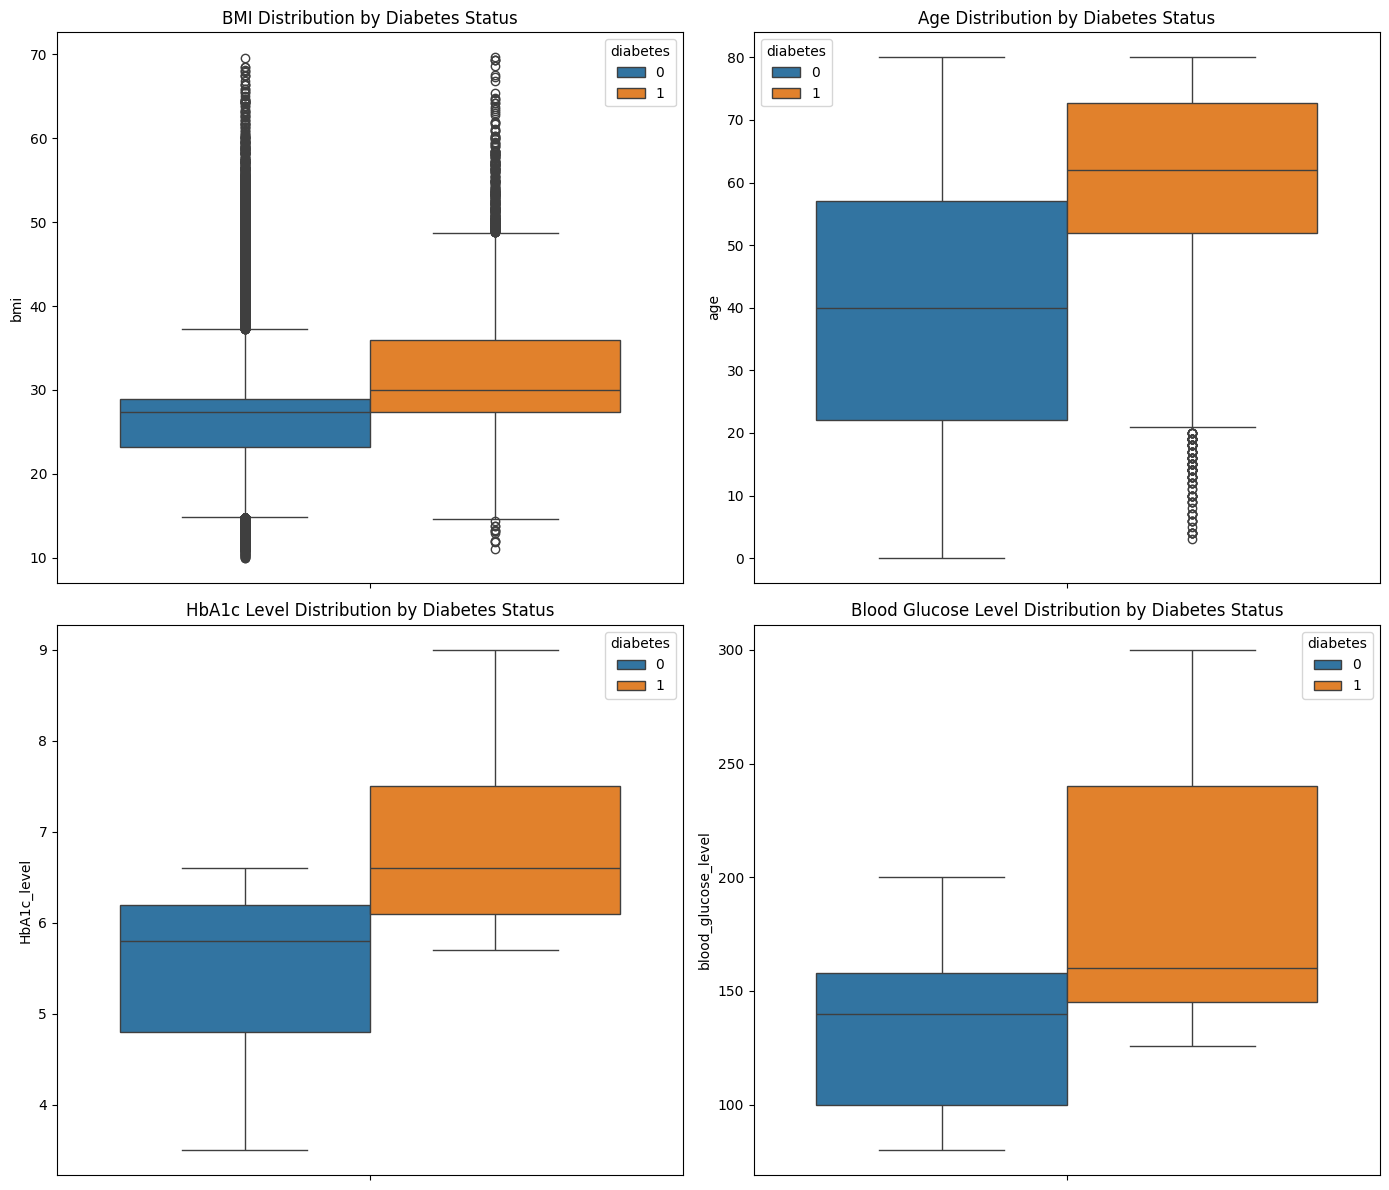

In [91]:
# 

fig, axes = plt.subplots(2, 2, figsize=(14, 12))  
axes = axes.flatten()  


sns.boxplot(data=df, y="bmi", hue="diabetes", ax=axes[0])
axes[0].set_title("BMI Distribution by Diabetes Status")

sns.boxplot(data=df, y="age", hue="diabetes", ax=axes[1])
axes[1].set_title("Age Distribution by Diabetes Status")

sns.boxplot(data=df, y="HbA1c_level", hue="diabetes", ax=axes[2])
axes[2].set_title("HbA1c Level Distribution by Diabetes Status")

sns.boxplot(data=df, y="blood_glucose_level", hue="diabetes", ax=axes[3])
axes[3].set_title("Blood Glucose Level Distribution by Diabetes Status")


plt.tight_layout()
plt.show()

## Conclusion from this chart
* 1- People with a high BMI have more diabetes than those with a low BMI.
* 2- Older people have more diabetes than younger people.
* 3- People with a high HbA1c level have more diabetes than those with a low HbA1c level.
* 4- People with a high blood glucose level have more diabetes than those with a low blood glucose level.

In [92]:
import plotly.graph_objects as go
##----------------------------------------------------
# Prepare the tapul for each column 


# heart_disease
heart_disease_df = df.groupby(["diabetes","heart_disease"])["diabetes"].count().reset_index(name="count")
heart_disease_df = heart_disease_df.loc[heart_disease_df["diabetes"] == 1]

# hypertension
hypertension_df = df.groupby(["diabetes","hypertension"])["diabetes"].count().reset_index(name="count")
hypertension_df = hypertension_df.loc[hypertension_df["diabetes"] == 1]

# is_fat
is_fat_df = df.groupby(["diabetes","is_fat"])["diabetes"].count().reset_index(name="count")
is_fat_df = is_fat_df.loc[is_fat_df["diabetes"] == 1]

# risk_age
risk_age_df = df.groupby(["diabetes","risk_age"])["diabetes"].count().reset_index(name="count")
risk_age_df = risk_age_df.loc[risk_age_df["diabetes"] == 1]

# glucose_risk_level
glucose_risk_level_df = df.groupby(["diabetes","glucose_risk_level"])["diabetes"].count().reset_index(name="count")
glucose_risk_level_df = glucose_risk_level_df.loc[glucose_risk_level_df["diabetes"] == 1]

# hba1c_risk_score
hba1c_risk_score_df = df.groupby(["diabetes","hba1c_risk_score"])["diabetes"].count().reset_index(name="count")
hba1c_risk_score_df = hba1c_risk_score_df.loc[hba1c_risk_score_df["diabetes"] == 1]





# -------------------------------------------------------------------------------
## miking the plot 
fig = make_subplots(rows=2, cols=3, specs=[[{'type':'domain'}]*3, [{'type':'domain'}]*3],
                    subplot_titles=(
                        "Heart Disease & Diabetes",
                        "Hypertension & Diabetes",
                        "Is Fat & Diabetes",
                        "Risk Age & Diabetes",
                        "Glucose Risk Level & Diabetes",
                        "HbA1c Risk Score & Diabetes"
                    ))

fig.add_trace(go.Pie(labels=heart_disease_df['heart_disease'],
                     values=heart_disease_df['count'],
                     name="Heart Disease"),
              row=1, col=1)

fig.add_trace(go.Pie(labels=hypertension_df['hypertension'],
                     values=hypertension_df['count'],
                     name="Hypertension"),
              row=1, col=2)

fig.add_trace(go.Pie(labels=is_fat_df['is_fat'],
                     values=is_fat_df['count'],
                     name="Is Fat"),
              row=1, col=3)

fig.add_trace(go.Pie(labels=risk_age_df['risk_age'],
                     values=risk_age_df['count'],
                     name="Risk Age"),
              row=2, col=1)

fig.add_trace(go.Pie(labels=glucose_risk_level_df['glucose_risk_level'],
                     values=glucose_risk_level_df['count'],
                     name="Glucose Risk"),
              row=2, col=2)

fig.add_trace(go.Pie(labels=hba1c_risk_score_df['hba1c_risk_score'],
                     values=hba1c_risk_score_df['count'],
                     name="HbA1c Risk"),
              row=2, col=3)

fig.update_layout(title_text="Distribution of Diabetesby Different Risk Factors",
                  height=700,
                  showlegend=False)

fig.show()

## Conclusion from this chart
* 1- 14.9% of people with diabetes have Heart Disease , if the person have Heart Disease his diabetes risk is 14.9%
* 2- 24.6% of people with diabetes have Heart Hypertension , if the person have Hypertension his diabetes risk is 24.6%
* 3- 89.1% of people with diabetes are fat , if the person is fat his diabetes risk is 89.1%
* 4- 58.1% of people with diabetes are older people , if the person is over 60 years old his diabetes risk is 58.1
* 5- 46.2% of people with diabetes them glucose level is high then 199, and 30.9% of people with diabetes them glucose level is high then 140
* and 23% of people with diabetes them glucose level is less than 144
* 6- 61.1% of people with diabetes them HbA1c scor is more then 6.5, and 22.9% of people with diabetes them HbA1c scor is more then 6 ,
* and 16% of people with diabetes them HbA1c scor is more then 5.7

### 4) Pre-Processing Mind Map:
* a- Detect & Handle Duplicates
* b- train_test_split
* c- Detect & Handle NaNs
* d- Detect & Handle Outliers
* e- Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f- Imbalanced: X_train_resampled
* g- Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [17]:
# a- Detect & Handle Duplicates
print(df.duplicated().sum())
# remove duplicate values
df.drop_duplicates(inplace=True , ignore_index=True)
print("Removed Duplicate")
print(df.duplicated().sum())


5211
Removed Duplicate
0


In [18]:
# d- Detect & Handle Outliers for "age","bmi","HbA1c_level","blood_glucose_level"

len(detect_outliers(df , 0 ,["age"])) / df.shape[0] * 100 # =  0.0%
len(detect_outliers(df , 0 ,["bmi"])) / df.shape[0] * 100 # = 5.5%
len(detect_outliers(df , 0 ,["HbA1c_level"])) / df.shape[0] * 100 # = 1.3%
len(detect_outliers(df , 0 ,["blood_glucose_level"])) / df.shape[0] * 100 # = 2.11%

# 5.5 + 1.3 + 2.11 = 8.91% outliers

len(detect_outliers(df , 0 ,["age","bmi","HbA1c_level","blood_glucose_level"])) # = 7919

df["diabetes"].value_counts(normalize=True ) * 100 # class 0 = 91.011582% of the data 
df.drop(index=detect_outliers(df , 0 ,["bmi","HbA1c_level","blood_glucose_level"]))["diabetes"].value_counts(normalize=True ) # class 0 = 94.609442% 

# all the outlier values in oclumn "age","bmi","HbA1c_level","blood_glucose_level" belong to class 1 after drop them the class will decrease
# so i will solve imbalanced after drop 

df.drop(index=detect_outliers(df , 0 ,["bmi","HbA1c_level","blood_glucose_level"]) , inplace=True)

In [19]:
# b- train_test_split
X = df.drop(columns=["diabetes"])
Y = df["diabetes"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2, shuffle=True, stratify=Y, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((69761, 14), (17441, 14), (69761,), (17441,))

In [20]:
# e- Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])

#column 1- gender i have ["Male" , "Female" , "Other"] and the those values are Nominal so i will ues OneHotEncoding 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore' , drop=None))
])

#column 2- smoking_history i made smoking_risk_level column and it has the same values so if i make Encoding to 
# smoking_history the model will see the values more than one time and the model maby will overfit so i will drop it 
X_train.drop(columns=["smoking_history"] , inplace=True)
X_test.drop(columns=["smoking_history"] , inplace=True)

In [97]:
# c- Detect & Handle NaNs

X_train.isna().sum() # = 0
X_test.isna().sum()  # = 0

Y_train.isna().sum() # = 0 
Y_test.isna().sum() # = 0

0

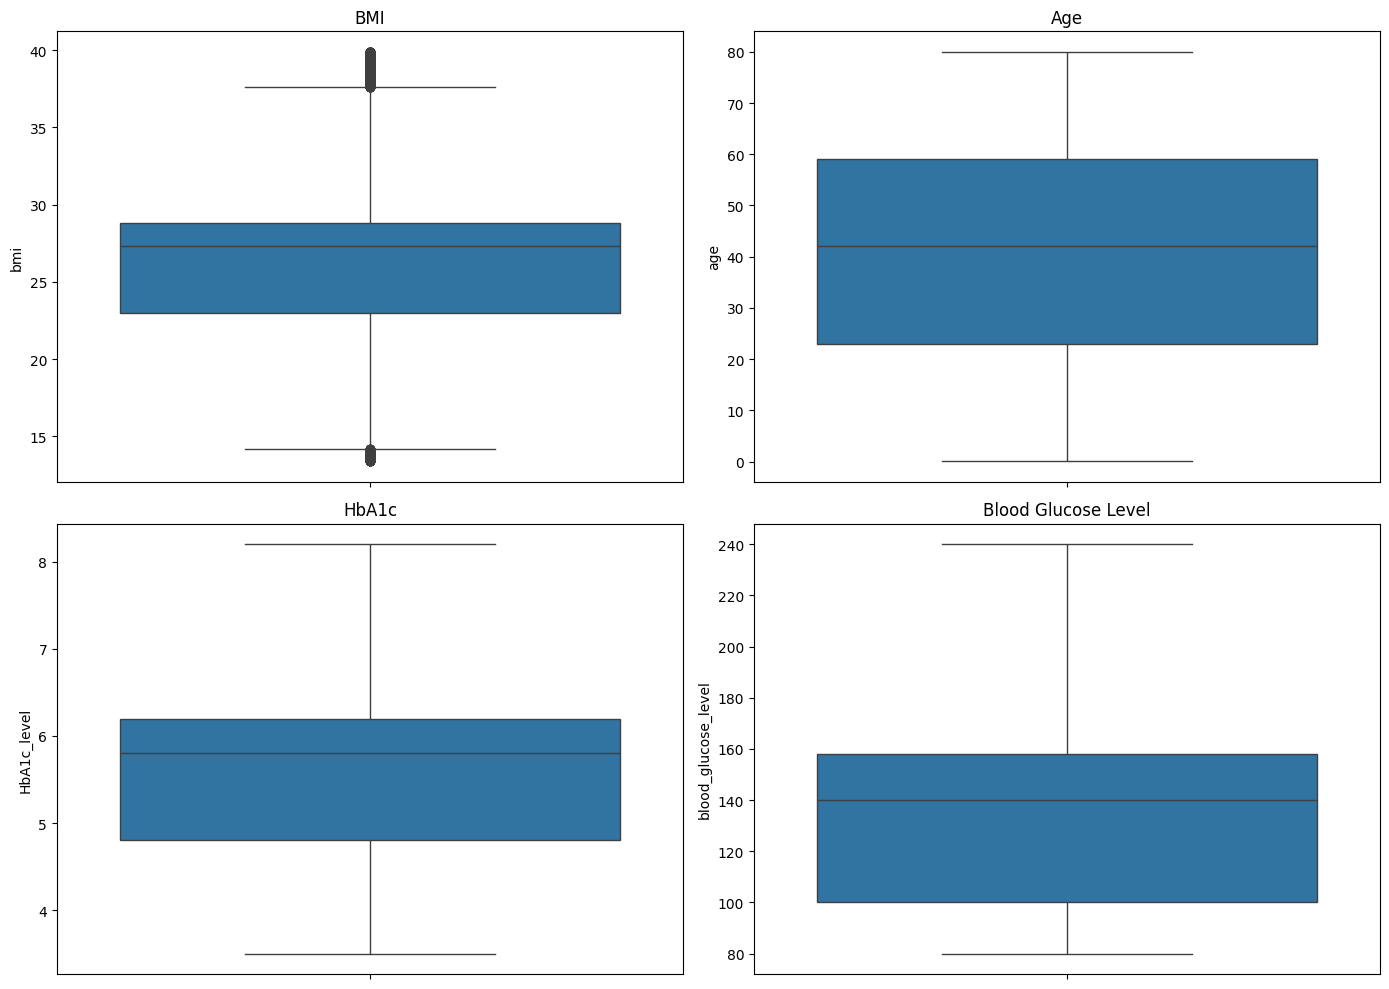

In [98]:
# g- Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  

sns.boxplot(data=X_train, y="bmi", ax=axes[0])
axes[0].set_title("BMI")


sns.boxplot(data=X_train, y="age", ax=axes[1])
axes[1].set_title("Age")


sns.boxplot(data=X_train, y="HbA1c_level", ax=axes[2])
axes[2].set_title("HbA1c")


sns.boxplot(data=X_train, y="blood_glucose_level", ax=axes[3])
axes[3].set_title("Blood Glucose Level")

plt.tight_layout()
plt.show()

In [21]:
# g- Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', RobustScaler())
])

In [22]:
# Making transformer to concatenate numerical pipeline and categorical pipeline
numeric_features = ["age", "bmi", "HbA1c_level", "blood_glucose_level", "risk_score"]
categorical_features = ['gender']

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [101]:
# Imbalanced
Y_train.value_counts(normalize=True ) * 100 # the target column is Imbalanced

0    94.681842
1     5.318158
Name: diabetes, dtype: float64

#### 5) Modeling

* 1) Simple Model & Evaluate it's Performance
* 2) Bias vs Variance (Underfitting vs Overfitting)
* 3) GridSearch
* 4) Test Perforamnce
* 5) Save Model

# 1) Simple Model & Evaluate it's Performan
## imbalanced solving
* 1) undersampling
* 2) oversampling

In [ ]:
# oversampling with Simple Model

Logistic_with_Smote = Pipeline([
        ("preprocessor" , preprocessor) ,
        ( 'smote' , SMOTE(random_state=42)),
        ('Logistic_model',  LogisticRegression(random_state=42 ,C=1 , max_iter=10000 ))
    ])


Logistic_with_Smote.fit(X_train , Y_train)

y_trin_pred = Logistic_with_Smote.predict(X_train)

Train_Accuracy = accuracy_score(Y_train, y_trin_pred)

valid_accuracy_score = []
skfolds = StratifiedKFold(n_splits=5)
i = 1


for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    
   

    Logistic_with_Smote.fit(X_train_fold , y_train_fold)
    y_valid_pred = Logistic_with_Smote.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Train Accuracy: 0.8559653674689296
Average Valid Accuracy: 0.8568397203965212


In [ ]:
# undersampling with Simple Model

Logistic_with_rus = Pipeline([
        ("preprocessor" , preprocessor) ,
        ( 'rus' , RandomUnderSampler(random_state=42)),
        ('Logistic_model',  LogisticRegression(random_state=42 ,C=1 , max_iter=10000 ))
    ])


Logistic_with_rus.fit(X_train , Y_train)

y_trin_pred = Logistic_with_rus.predict(X_train)

Train_Accuracy = accuracy_score(Y_train, y_trin_pred)


valid_accuracy_score = []
skfolds = StratifiedKFold(n_splits=5)
i = 1


for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    
   

    Logistic_with_rus.fit(X_train_fold , y_train_fold)
    y_valid_pred = Logistic_with_rus.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Train Accuracy: 0.8568971201674288
Average Valid Accuracy: 0.8544745626207775


# 2) Bias vs Variance (Underfitting vs Overfitting)
## Train more complex model

# KNeighborsClassifier with (undersampling and oversampling )

In [ ]:
# undersampling with KNeighborsClassifier

knn_with_rus = Pipeline([
        ("preprocessor" , preprocessor) ,
        ( 'rus' , RandomUnderSampler(random_state=42)),
        ('knn',  KNeighborsClassifier())
    ])
params = {
    'knn__n_neighbors': [31],
    'knn__weights': ['uniform'],
    'knn__algorithm': ['auto'],
    'knn__leaf_size': [30, 40],
}
grid_search = GridSearchCV(estimator=knn_with_rus,
                            param_grid=params,
                            cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train , Y_train)
y_trin_pred = grid_search.predict(X_train)
Train_Accuracy = accuracy_score(Y_train, y_trin_pred)



skfolds = StratifiedKFold(n_splits=5)
i = 1
valid_accuracy_score = []

for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    
   

    grid_search.fit(X_train_fold , y_train_fold)
    y_valid_pred = grid_search.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")


Fitting 5 folds for each of 2 candidates, totalling 10 fits
At fold 1
Fitting 5 folds for each of 2 candidates, totalling 10 fits
At fold 2
Fitting 5 folds for each of 2 candidates, totalling 10 fits
At fold 3
Fitting 5 folds for each of 2 candidates, totalling 10 fits
At fold 4
Fitting 5 folds for each of 2 candidates, totalling 10 fits
At fold 5
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Train Accuracy: 0.8339473344705495
Average Valid Accuracy: 0.8328149852026167


In [ ]:
# oversampling with KNeighborsClassifier

knn_with_Smote = Pipeline([
        ("preprocessor" , preprocessor) ,
        ( 'smote' , SMOTE(random_state=42)),
        ('knn',  KNeighborsClassifier())
    ])
params = {
    'knn__n_neighbors': [99],
    'knn__weights': ['uniform'],
    'knn__algorithm': ['auto'],
    'knn__leaf_size': [2],
}
grid_search = GridSearchCV(estimator=knn_with_Smote,
                            param_grid=params,
                            cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train , Y_train)
y_trin_pred = grid_search.predict(X_train)
Train_Accuracy = accuracy_score(Y_train, y_trin_pred)



skfolds = StratifiedKFold(n_splits=5)
i = 1
valid_accuracy_score = []

for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    
   

    grid_search.fit(X_train_fold , y_train_fold)
    y_valid_pred = grid_search.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 1
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 2
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 3
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 4
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 5
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Accuracy: 0.8248591619959577
Average Valid Accuracy: 0.8217341848650482


# RandomForestClassifier with (undersampling and oversampling )

In [ ]:
# oversampling with RandomForestClassifier

rf_with_Smote = Pipeline([
        ("preprocessor" , preprocessor) ,
        ( 'smote' , SMOTE(random_state=42)),
        ('rf',  RandomForestClassifier(random_state=42))
    ])
params = {
    "rf__n_estimators": [100],
    "rf__max_depth": [30],
    "rf__min_samples_split": [5],   
}
grid_search = GridSearchCV(estimator=rf_with_Smote,
                            param_grid=params,
                            cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train , Y_train)
y_trin_pred = grid_search.predict(X_train)
Train_Accuracy = accuracy_score(Y_train, y_trin_pred)



skfolds = StratifiedKFold(n_splits=5)
i = 1
valid_accuracy_score = []

for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    
   

    grid_search.fit(X_train_fold , y_train_fold)
    y_valid_pred = grid_search.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 1
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 2
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 3
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 4
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 5
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Accuracy: 0.9943091412107051
Average Valid Accuracy: 0.9604507064427301


In [ ]:
# undersampling with RandomForestClassifier

rf_with_rus = Pipeline([
        ("preprocessor" , preprocessor) ,
        ( 'rus' , RandomUnderSampler(random_state=42)),
        ('rf',  RandomForestClassifier(random_state=42))
    ])
params = {
    "rf__n_estimators": [100],
    "rf__max_depth": [30],
    "rf__min_samples_split": [5],   
}
grid_search = GridSearchCV(estimator=rf_with_rus,
                            param_grid=params,
                            cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train , Y_train)
y_trin_pred = grid_search.predict(X_train)
Train_Accuracy = accuracy_score(Y_train, y_trin_pred)



skfolds = StratifiedKFold(n_splits=5)
i = 1
valid_accuracy_score = []

for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    
   

    grid_search.fit(X_train_fold , y_train_fold)
    y_valid_pred = grid_search.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 1
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 2
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 3
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 4
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 5
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Accuracy: 0.8685942001978183
Average Valid Accuracy: 0.8552630098456351


# DecisionTreeClassifier with (undersampling and oversampling )

In [ ]:
# oversampling with RandomForestClassifier

dt_with_Smote = Pipeline([
        ("preprocessor" , preprocessor) ,
        ( 'smote' , SMOTE(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ])
params = {
    'dt__criterion': ['entropy'],
    'dt__max_depth': [20],
    'dt__min_samples_split': [10],
    'dt__min_samples_leaf': [10 ],
}
grid_search = GridSearchCV(estimator=dt_with_Smote,
                            param_grid=params, 
                            cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train , Y_train)
y_trin_pred = grid_search.predict(X_train)
Train_Accuracy = accuracy_score(Y_train, y_trin_pred)

skfolds = StratifiedKFold(n_splits=5)
i = 1
valid_accuracy_score = []

for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    
   

    grid_search.fit(X_train_fold , y_train_fold)
    y_valid_pred = grid_search.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 1
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 2
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 3
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 4
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 5
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Accuracy: 0.957841774057138
Average Valid Accuracy: 0.9413282804921108


In [ ]:
# undersampling with RandomForestClassifier

dt_with_rus = Pipeline([
        ("preprocessor" , preprocessor) ,
        ( 'rus' , RandomUnderSampler(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ])
params = {
    'dt__criterion': ['entropy'],
    'dt__max_depth': [20],
    'dt__min_samples_split': [10],
    'dt__min_samples_leaf': [10 ],
}
grid_search = GridSearchCV(estimator=dt_with_rus,
                            param_grid=params, 
                            cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train , Y_train)
y_trin_pred = grid_search.predict(X_train)
Train_Accuracy = accuracy_score(Y_train, y_trin_pred)

skfolds = StratifiedKFold(n_splits=5)
i = 1
valid_accuracy_score = []

for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    
   

    grid_search.fit(X_train_fold , y_train_fold)
    y_valid_pred = grid_search.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 1
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 2
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 3
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 4
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 5
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Accuracy: 0.8643654764123221
Average Valid Accuracy: 0.8632616699115049


# SVC with (undersampling and oversampling )

In [ ]:
# oversampling svc Classifier

SVC_with_Smote = Pipeline([
        ("preprocessor" , preprocessor) ,
        ( 'smote' , SMOTE(random_state=42)),
        ('SVC',SVC(random_state=42))
    ])
params = {
    'SVC__C': [1],
    'SVC__kernel': ['poly'],
    'SVC__gamma': ['auto'],
    'SVC__degree': [2]  
}
grid_search = GridSearchCV(estimator=SVC_with_Smote,
                            param_grid=params, cv=5, 
                            n_jobs=-1, verbose=1)
grid_search.fit(X_train , Y_train)
y_trin_pred = grid_search.predict(X_train)
Train_Accuracy = accuracy_score(Y_train, y_trin_pred)

skfolds = StratifiedKFold(n_splits=5)
i = 1
valid_accuracy_score = []

for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    
   

    grid_search.fit(X_train_fold , y_train_fold)
    y_valid_pred = grid_search.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 1
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 2
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 3
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 4
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 5
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Accuracy: 0.8468628603374379
Average Valid Accuracy: 0.8477229009972536


In [ ]:
# undersampling with SVC Classifier

SVC_with_rus = Pipeline([
        ("preprocessor" , preprocessor) ,
        ( 'rus' , RandomUnderSampler(random_state=42) ),
        ('SVC',SVC(random_state=42))
    ])
params = {
    'SVC__C': [1],
    'SVC__kernel': ['poly'],
    'SVC__gamma': ['auto'],
    'SVC__degree': [2]  
}
grid_search = GridSearchCV(estimator=SVC_with_rus, 
                           param_grid=params, cv=5, 
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train , Y_train)
y_trin_pred = grid_search.predict(X_train)
Train_Accuracy = accuracy_score(Y_train, y_trin_pred)

skfolds = StratifiedKFold(n_splits=5)
i = 1
valid_accuracy_score = []

for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    
   

    grid_search.fit(X_train_fold , y_train_fold)
    y_valid_pred = grid_search.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 1
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 2
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 3
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 4
Fitting 5 folds for each of 1 candidates, totalling 5 fits
At fold 5
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Accuracy: 0.8537004916787316
Average Valid Accuracy: 0.8489557310107918


# GradientBoostingClassifier with (undersampling and oversampling )

In [ ]:
# oversampling with GradientBoostingClassifier


gbc_with_Smote = Pipeline([
        ("preprocessor" , preprocessor) ,
        ( 'smote' , SMOTE(random_state=42)),
        ('gbc',GradientBoostingClassifier(random_state=42))
    ])
params = {
    'gbc__learning_rate': [0.8,1],
    'gbc__max_depth': [5],
    'gbc__subsample': [0.5] ,
    'gbc__n_estimators' : [200]
}
grid_search = GridSearchCV(estimator=gbc_with_Smote, 
                           param_grid=params, cv=5, 
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train , Y_train)
y_trin_pred = grid_search.predict(X_train)
Train_Accuracy = accuracy_score(Y_train, y_trin_pred)

skfolds = StratifiedKFold(n_splits=5)
i = 1
valid_accuracy_score = []

for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    
   

    grid_search.fit(X_train_fold , y_train_fold)
    y_valid_pred = grid_search.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
At fold 1
Fitting 5 folds for each of 2 candidates, totalling 10 fits
At fold 2
Fitting 5 folds for each of 2 candidates, totalling 10 fits
At fold 3
Fitting 5 folds for each of 2 candidates, totalling 10 fits
At fold 4
Fitting 5 folds for each of 2 candidates, totalling 10 fits
At fold 5
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Train Accuracy: 0.9740256016972234
Average Valid Accuracy: 0.9538566594718049


In [ ]:
# undersampling with GradientBoostingClassifier
gbc_with_rus = Pipeline([
        ("preprocessor" , preprocessor) ,
        ( 'rus' ,  RandomUnderSampler(random_state=42)),
        ('gbc',GradientBoostingClassifier(random_state=42))
    ])
params = {
    'gbc__learning_rate': [0.8,1],
    'gbc__max_depth': [5],
    'gbc__subsample': [0.5] ,
    'gbc__n_estimators' : [200]
}
grid_search = GridSearchCV(estimator=gbc_with_rus, 
                           param_grid=params, cv=5, 
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train , Y_train)
y_trin_pred = grid_search.predict(X_train)
Train_Accuracy = accuracy_score(Y_train, y_trin_pred)

skfolds = StratifiedKFold(n_splits=5)
i = 1
valid_accuracy_score = []

for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    
   

    grid_search.fit(X_train_fold , y_train_fold)
    y_valid_pred = grid_search.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
At fold 1
Fitting 5 folds for each of 2 candidates, totalling 10 fits
At fold 2
Fitting 5 folds for each of 2 candidates, totalling 10 fits
At fold 3
Fitting 5 folds for each of 2 candidates, totalling 10 fits
At fold 4
Fitting 5 folds for each of 2 candidates, totalling 10 fits
At fold 5
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Train Accuracy: 0.7820558764925961
Average Valid Accuracy: 0.7979824130666057


# XGBClassifier with (undersampling and oversampling )

In [ ]:
# oversampling with XGBClassifier


XGB_with_Smote = Pipeline([
        ("preprocessor" , preprocessor) ,
        ( 'smote' , SMOTE(random_state=42)),
        ('XGB',XGBClassifier(eval_metric='logloss', random_state=42))
    ])
params = {
    'XGB__n_estimators': [300 , 500],
    'XGB__max_depth': [3, 6],
    'XGB__learning_rate': [0.05, 0.1],
    'XGB__subsample': [0.8, 1],
}
grid_search = GridSearchCV(estimator=XGB_with_Smote, 
                           param_grid=params, cv=3, n_jobs=-1, 
                           verbose=1 , scoring='accuracy')

grid_search.fit(X_train , Y_train)
y_trin_pred = grid_search.predict(X_train)
Train_Accuracy = accuracy_score(Y_train, y_trin_pred)

skfolds = StratifiedKFold(n_splits=5)
i = 1
valid_accuracy_score = []

for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    
   

    grid_search.fit(X_train_fold , y_train_fold)
    y_valid_pred = grid_search.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
At fold 1
Fitting 3 folds for each of 16 candidates, totalling 48 fits
At fold 2
Fitting 3 folds for each of 16 candidates, totalling 48 fits
At fold 3
Fitting 3 folds for each of 16 candidates, totalling 48 fits
At fold 4
Fitting 3 folds for each of 16 candidates, totalling 48 fits
At fold 5
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Train Accuracy: 0.974412637433523
Average Valid Accuracy: 0.9683634446605478


In [ ]:
# undersampling with XGBClassifier

XGB_with_rus = Pipeline([
        ("preprocessor" , preprocessor) ,
        ( 'rus' , RandomUnderSampler(random_state=42) ),
        ('XGB',XGBClassifier(eval_metric='logloss', random_state=42))
    ])
params = {
    'XGB__n_estimators': [300 , 500],
    'XGB__max_depth': [3, 6],
    'XGB__learning_rate': [0.05, 0.1],
    'XGB__subsample': [0.8, 1],
}
grid_search = GridSearchCV(estimator=XGB_with_rus, 
                           param_grid=params, cv=3, n_jobs=-1, 
                           verbose=1 , scoring='accuracy')

grid_search.fit(X_train , Y_train)
y_trin_pred = grid_search.predict(X_train)
Train_Accuracy = accuracy_score(Y_train, y_trin_pred)

skfolds = StratifiedKFold(n_splits=5)
i = 1
valid_accuracy_score = []

for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    
   

    grid_search.fit(X_train_fold , y_train_fold)
    y_valid_pred = grid_search.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
At fold 1
Fitting 3 folds for each of 16 candidates, totalling 48 fits
At fold 2
Fitting 3 folds for each of 16 candidates, totalling 48 fits
At fold 3
Fitting 3 folds for each of 16 candidates, totalling 48 fits
At fold 4
Fitting 3 folds for each of 16 candidates, totalling 48 fits
At fold 5
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Train Accuracy: 0.8717764940296154
Average Valid Accuracy: 0.865885005205878


# CatBoostClassifier with (undersampling and oversampling )

In [ ]:
# oversampling with CatBoostClassifier


CatBoost_with_smote = Pipeline([
        ("preprocessor" , preprocessor) ,
        ('smote', SMOTE(random_state=42)),
        ('CatBoost',  CatBoostClassifier(silent=True))
    ])
params = {
    'CatBoost__iterations': [50, 100],
    'CatBoost__learning_rate': [0.05, 0.1],
    'CatBoost__depth': [3, 4, 6]
}
grid_search = GridSearchCV(estimator=CatBoost_with_smote, 
                           param_grid=params, cv=3, 
                           n_jobs=-1, verbose=1 , 
                           scoring='accuracy')
grid_search.fit(X_train , Y_train)
y_trin_pred = grid_search.predict(X_train)
Train_Accuracy = accuracy_score(Y_train, y_trin_pred)

skfolds = StratifiedKFold(n_splits=5)
i = 1
valid_accuracy_score = []

for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    
   

    grid_search.fit(X_train_fold , y_train_fold)
    y_valid_pred = grid_search.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
At fold 1
Fitting 3 folds for each of 12 candidates, totalling 36 fits
At fold 2
Fitting 3 folds for each of 12 candidates, totalling 36 fits
At fold 3
Fitting 3 folds for each of 12 candidates, totalling 36 fits
At fold 4
Fitting 3 folds for each of 12 candidates, totalling 36 fits
At fold 5
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Train Accuracy: 0.9491693066326458
Average Valid Accuracy: 0.9491120357694935


In [ ]:
# undersampling with CatBoostClassifier
CatBoost_with_rus = Pipeline([
        ("preprocessor" , preprocessor) ,
        ('rus', RandomUnderSampler(random_state=42)),
        ('CatBoost',  CatBoostClassifier(silent=True))
    ])
params = {
    'CatBoost__iterations': [50, 100],
    'CatBoost__learning_rate': [0.05, 0.1],
    'CatBoost__depth': [3, 4, 6]
}
grid_search = GridSearchCV(estimator=CatBoost_with_rus, 
                           param_grid=params, cv=3, 
                           n_jobs=-1, verbose=1 , 
                           scoring='accuracy')
grid_search.fit(X_train , Y_train)
y_trin_pred = grid_search.predict(X_train)
Train_Accuracy = accuracy_score(Y_train, y_trin_pred)

skfolds = StratifiedKFold(n_splits=5)
i = 1
valid_accuracy_score = []

for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    
   

    grid_search.fit(X_train_fold , y_train_fold)
    y_valid_pred = grid_search.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
At fold 1
Fitting 3 folds for each of 12 candidates, totalling 36 fits
At fold 2
Fitting 3 folds for each of 12 candidates, totalling 36 fits
At fold 3
Fitting 3 folds for each of 12 candidates, totalling 36 fits
At fold 4
Fitting 3 folds for each of 12 candidates, totalling 36 fits
At fold 5
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Train Accuracy: 0.8670460572526196
Average Valid Accuracy: 0.8630037091674737


# HistGradientBoostingClassifier with (undersampling and oversampling )

In [ ]:
# undersampling with HistGradientBoostingClassifier


HistGradient_with_rus = Pipeline([
        ("preprocessor" , preprocessor) ,
        ('rus', RandomUnderSampler(random_state=42)),
        ('HistGradient', HistGradientBoostingClassifier(random_state=42))
    ])
params = {
    'HistGradient__learning_rate': [0.1],
    'HistGradient__max_iter': [200],
    'HistGradient__max_depth': [5, None],
    'HistGradient__l2_regularization': [1.0],
}
grid_search = GridSearchCV(estimator=HistGradient_with_rus, 
                           param_grid=params, cv=3, 
                           n_jobs=-1, verbose=1 , 
                           scoring='accuracy')
grid_search.fit(X_train , Y_train)
y_trin_pred = grid_search.predict(X_train)
Train_Accuracy = accuracy_score(Y_train, y_trin_pred)

skfolds = StratifiedKFold(n_splits=5)
i = 1
valid_accuracy_score = []

for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    
   

    grid_search.fit(X_train_fold , y_train_fold)
    y_valid_pred = grid_search.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

Fitting 3 folds for each of 2 candidates, totalling 6 fits
At fold 1
Fitting 3 folds for each of 2 candidates, totalling 6 fits
At fold 2
Fitting 3 folds for each of 2 candidates, totalling 6 fits
At fold 3
Fitting 3 folds for each of 2 candidates, totalling 6 fits
At fold 4
Fitting 3 folds for each of 2 candidates, totalling 6 fits
At fold 5
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Train Accuracy: 0.8738836885939135
Average Valid Accuracy: 0.8634911499664337


In [ ]:
# oversampling with HistGradientBoostingClassifier


HistGradient_with_smote = Pipeline([
        ("preprocessor" , preprocessor) ,
        ('smote', SMOTE(random_state=42)),
        ('HistGradient', HistGradientBoostingClassifier(random_state=42))
    ])
params = {
    'HistGradient__learning_rate': [0.1],
    'HistGradient__max_iter': [200],
    'HistGradient__max_depth': [ 5, None],
    'HistGradient__l2_regularization': [ 1.0],
}
grid_search = GridSearchCV(estimator=HistGradient_with_smote, 
                           param_grid=params, cv=3, 
                           n_jobs=-1, verbose=1 , 
                           scoring='accuracy')
grid_search.fit(X_train , Y_train)
y_trin_pred = grid_search.predict(X_train)
Train_Accuracy = accuracy_score(Y_train, y_trin_pred)

skfolds = StratifiedKFold(n_splits=5)
i = 1
valid_accuracy_score = []

for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    
   

    grid_search.fit(X_train_fold , y_train_fold)
    y_valid_pred = grid_search.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

Fitting 3 folds for each of 2 candidates, totalling 6 fits
At fold 1
Fitting 3 folds for each of 2 candidates, totalling 6 fits
At fold 2
Fitting 3 folds for each of 2 candidates, totalling 6 fits
At fold 3
Fitting 3 folds for each of 2 candidates, totalling 6 fits
At fold 4
Fitting 3 folds for each of 2 candidates, totalling 6 fits
At fold 5
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Train Accuracy: 0.9750863663078224
Average Valid Accuracy: 0.9682631098701604


# Model Comparison Summary

After comparing the performance of various models using **undersampling** and **oversampling** techniques, here is the evaluation:

### 1. **Logistic Regression**
- **Undersampling**: Train Accuracy: 0.85, Valid Accuracy: 0.85
- **Oversampling**: Train Accuracy: 0.85, Valid Accuracy: 0.85

### 2. **KNN**
- **Undersampling**: Train Accuracy: 0.83, Valid Accuracy: 0.83
- **Oversampling**: Train Accuracy: 0.82, Valid Accuracy: 0.82

### 3. **Random Forest Classifier**
- **Undersampling**: Train Accuracy: 0.86, Valid Accuracy: 0.85
- **Oversampling**: Train Accuracy: 0.99, Valid Accuracy: 0.96

### 4. **Decision Tree Classifier**
- **Undersampling**: Train Accuracy: 0.86, Valid Accuracy: 0.86
- **Oversampling**: Train Accuracy: 0.95, Valid Accuracy: 0.94

### 5. **SVC**
- **Undersampling**: Train Accuracy: 0.85, Valid Accuracy: 0.84
- **Oversampling**: Train Accuracy: 0.84, Valid Accuracy: 0.84

### 6. **Gradient Boosting Classifier**
- **Undersampling**: Train Accuracy: 0.87, Valid Accuracy: 0.79
- **Oversampling**: Train Accuracy: 0.97, Valid Accuracy: 0.95

### 7. **XGBoost Classifier**
- **Undersampling**: Train Accuracy: 0.87, Valid Accuracy: 0.86
- **Oversampling**: Train Accuracy: 0.97, Valid Accuracy: 0.96

### 8. **CatBoost Classifier**
- **Undersampling**: Train Accuracy: 0.86, Valid Accuracy: 0.86
- **Oversampling**: Train Accuracy: 0.94, Valid Accuracy: 0.94

### 9. **HistGradientBoosting Classifier**
- **Undersampling**: Train Accuracy: 0.87, Valid Accuracy: 0.86
- **Oversampling**: Train Accuracy: 0.97, Valid Accuracy: 0.96
---

### **The Best Models:**
- **Best Models wit Oversampling**
  - **1- XGBoost**: 0.97 , 0.96
  - **2- CatBoost**: 0.94 , 94
  - **3- HistGradientBoosting** : 0.97 , 0.96
  - : Those models achieved the highest training and validation accuracy across . **Oversampling** helped improve performance significantly.

---

# **Ensembling Learning Technique with the best models**
### *Bagging* : i used Random Forest and the accuracy is **T**:99 - **v**:96
### *Boosting* : i used Gradient Boosting and the accuracy is **T**:97 - **v**:95
### *Stacking* : lets try tis technique with the best three model(**XGBoost** - **CatBoost** - **HistGradientBoosting** )

# **stacking**

In [103]:
# oversampling with CatBoostClassifier for stacking 

CatBoost= Pipeline([
        ("preprocessor" , preprocessor) ,
        ('smote', SMOTE(random_state=42)),
        ('CatBoost',  CatBoostClassifier(silent=True))
    ])
CatBoost_params = {
    'CatBoost__iterations': [200 , 300],
    'CatBoost__learning_rate': [0.2],
    'CatBoost__depth': [4,8],
    'CatBoost__l2_leaf_reg': [1,5]
}
final_catboost_pipeline = GridSearchCV(estimator=CatBoost, 
                           param_grid=CatBoost_params, cv=3, 
                           n_jobs=-1, verbose=1 , 
                           scoring='accuracy')

#--------------------------------------------------------------------
# Making Grid Search for final estimator for stacking 

hist_param_grid = {
    'learning_rate': [0.2],
    'max_iter': [200],
    'max_depth': [None,10]
}

final_hist_estimator = GridSearchCV(
    estimator=HistGradientBoostingClassifier(random_state=42),
    param_grid=hist_param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)



#--------------------------------------------------------------------
# oversampling with XGBClassifier for stacking 

XGB = Pipeline([
        ("preprocessor" , preprocessor) ,
        ( 'smote' , SMOTE(random_state=42)),
        ('XGB',XGBClassifier(eval_metric='logloss', random_state=42))
    ])
XGB_params = {
    'XGB__n_estimators': [200 , 300],
    'XGB__learning_rate': [0.2],
    'XGB__max_depth': [3, 7],
    'XGB__subsample': [0.8, 1.0],
    'XGB__colsample_bytree': [0.8, 1.0]
}
final_xgb_pipeline = GridSearchCV(estimator=XGB, 
                           param_grid=XGB_params, cv=3, n_jobs=-1, 
                           verbose=1 , scoring='accuracy')


#--------------------------------------------------------------------
# oversampling with HistGradientBoostingClassifier for stacking 


from sklearn.ensemble import HistGradientBoostingClassifier

HistGradient = Pipeline([
        ("preprocessor" , preprocessor) ,
        ('smote', SMOTE(random_state=42)),
        ('HistGradient', HistGradientBoostingClassifier(random_state=42))
    ])
HistGradient_params = {
    'HistGradient__learning_rate': [0.2],
    'HistGradient__max_iter': [200 , 300],
    'HistGradient__max_depth': [None,10]
}
final_HistGradient_pipeline = GridSearchCV(estimator=HistGradient, 
                           param_grid=HistGradient_params, cv=3, 
                           n_jobs=-1, verbose=1 , 
                           scoring='accuracy')



#--------------------------------------------------------------------
from sklearn.ensemble import StackingClassifier

# Concatenation all models with its best barometer together And the final estimator with grit search

Stacking_model = StackingClassifier(estimators= [('XGB' , final_xgb_pipeline),
                                ('HistGradient' , final_HistGradient_pipeline ),
                                ('CatBoost' , final_catboost_pipeline)]
                                ,final_estimator= final_hist_estimator, 
                                cv= 5, n_jobs=-1)

Stacking_model.fit(X_train , Y_train)

y_trin_pred = Stacking_model.predict(X_train)

Train_Accuracy = accuracy_score(Y_train, y_trin_pred)

skfolds = StratifiedKFold(n_splits=3)
i = 1
valid_accuracy_score = []

for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    

    Stacking_model.fit(X_train_fold , y_train_fold)
    y_valid_pred = Stacking_model.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

Fitting 3 folds for each of 2 candidates, totalling 6 fits
At fold 1
Fitting 3 folds for each of 2 candidates, totalling 6 fits
At fold 2
Fitting 3 folds for each of 2 candidates, totalling 6 fits
At fold 3
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Train Accuracy: 0.9732658648815241
Average Valid Accuracy: 0.972878831394417


In [104]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

y_train_pred = Stacking_model.predict(X_train)
train_f1 = f1_score(Y_train, y_train_pred) 
print(f"fi score {train_f1}")


train_precision = precision_score(Y_train, y_trin_pred)
train_recall = recall_score(Y_train, y_trin_pred)


print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")


y_valid_pred = Stacking_model.predict(X_test)
print(f"test score {accuracy_score(Y_test, y_valid_pred)}")

fi score 0.666068544769424
Precision: 0.988353626257279
Recall: 0.5032345013477089
test score 0.9708732297460008


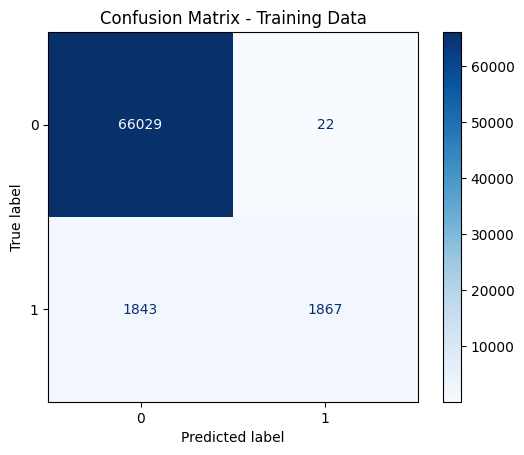

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay 
# Confusion Matrix for Training Data
cm_train = confusion_matrix(Y_train, y_trin_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues')
plt.title("Confusion Matrix - Training Data")
plt.show()


In [106]:
estimators = Stacking_model.named_estimators_
XGB_Best = estimators['XGB'].best_params_
HistGradient_Best = estimators['HistGradient'].best_params_
CatBoost_Best = estimators['CatBoost'].best_params_
print("Best Params for XGB:")
print(XGB_Best)

print("\nBest Params for HistGradient:")
print(HistGradient_Best)

print("\nBest Params for CatBoost:")
print(CatBoost_Best)


Best Params for XGB:
{'XGB__colsample_bytree': 1.0, 'XGB__learning_rate': 0.2, 'XGB__max_depth': 3, 'XGB__n_estimators': 300, 'XGB__subsample': 0.8}

Best Params for HistGradient:
{'HistGradient__learning_rate': 0.2, 'HistGradient__max_depth': 10, 'HistGradient__max_iter': 200}

Best Params for CatBoost:
{'CatBoost__depth': 4, 'CatBoost__iterations': 300, 'CatBoost__l2_leaf_reg': 1, 'CatBoost__learning_rate': 0.2}


# In This Problem, I Have to Focus on ***Recall***

## Very Important to Find All People Who Have Diabetes:

- In medical diagnosis, we should **not make the mistake** of saying someone is healthy when they actually have diabetes.  
- If that happens, they **won’t get the treatment** they need, and their health could **get worse**.

That’s why it’s important to focus on ***recall*** 
to make sure we **catch as many real cases of diabetes as possible**.

# *Extract future for increasing the* **Accuracy**

In [23]:
# i will ues Clustering model for extract future "The distance between each point And it's centre or class"

from sklearn.cluster import KMeans


X_combined = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
y_combined = np.concatenate((Y_train, Y_test), axis=0)


KMeans_model = Pipeline([
        ("preprocessor" , preprocessor) ,
        ( 'smote' , SMOTE(random_state=42)),
        ('KM', KMeans(n_clusters=2 , max_iter=300 , n_init=20))
    ])

scor = 0 
while scor < 0.70 :


    KMeans_model.fit(X_combined, y_combined)

    cluster_labels = KMeans_model.predict(X_combined)
    scor = accuracy_score(y_combined, cluster_labels)

print(f"the accuracy of the model {scor}")


joblib.dump(KMeans_model, 'model_for_extract_future.pkl')

the accuracy of the model 0.7067727804408156


['model_for_extract_future.pkl']

In [108]:
X_train_new_future = pd.DataFrame(KMeans_model.transform(X_train), columns=["distance_to_centroid_0", "distance_to_centroid_1"])
X_test_new_future = pd.DataFrame(KMeans_model.transform(X_test), columns=["distance_to_centroid_0", "distance_to_centroid_1"])

X_train = pd.concat([X_train.reset_index(drop=True), X_train_new_future.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_new_future.reset_index(drop=True)], axis=1)

In [109]:
X_train["age_hba1c_interaction"] = X_train["age"] * X_train["HbA1c_level"]
X_train["bmi_glucose_interaction"] =  X_train["bmi"] * X_train["blood_glucose_level"]
X_train["bmi_age_ratio"] = X_train["bmi"] / X_train["age"]
X_train['glucose_triple_score'] = (X_train['blood_glucose_level'] * X_train['HbA1c_level']) / X_train['bmi']

X_test["age_hba1c_interaction"] = X_test["age"] * X_test["HbA1c_level"]
X_test["bmi_glucose_interaction"] =  X_test["bmi"] * X_test["blood_glucose_level"]
X_test["bmi_age_ratio"] = X_test["bmi"] / X_test["age"]
X_test['glucose_triple_score'] = (X_test['blood_glucose_level'] * X_test['HbA1c_level']) / X_test['bmi']


# trin the **model** agin with the new future

In [110]:
estimators = Stacking_model.named_estimators_
XGB_Best = estimators['XGB'].best_params_
HistGradient_Best = estimators['HistGradient'].best_params_
CatBoost_Best = estimators['CatBoost'].best_params_
print("Best Params for XGB:")
print(XGB_Best)

print("\nBest Params for HistGradient:")
print(HistGradient_Best)

print("\nBest Params for CatBoost:")
print(CatBoost_Best)

Best Params for XGB:
{'XGB__colsample_bytree': 1.0, 'XGB__learning_rate': 0.2, 'XGB__max_depth': 3, 'XGB__n_estimators': 300, 'XGB__subsample': 0.8}

Best Params for HistGradient:
{'HistGradient__learning_rate': 0.2, 'HistGradient__max_depth': 10, 'HistGradient__max_iter': 200}

Best Params for CatBoost:
{'CatBoost__depth': 4, 'CatBoost__iterations': 300, 'CatBoost__l2_leaf_reg': 1, 'CatBoost__learning_rate': 0.2}


In [111]:
from sklearn.ensemble import StackingClassifier


numeric_features = ["age", "bmi", "HbA1c_level", "blood_glucose_level",
                    "risk_score" , "distance_to_centroid_0", "distance_to_centroid_1",
                    "age_hba1c_interaction","bmi_glucose_interaction","bmi_age_ratio" ,'glucose_triple_score']
categorical_features = ['gender']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore' , drop=None))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)
# ------------------------------------------------------------
final_catboost_pipeline= Pipeline([
        ("preprocessor" , preprocessor) ,
        ('smote', SMOTE(random_state=42)),
        ('CatBoost',  CatBoostClassifier(silent=True, depth = 4, iterations = 300, l2_leaf_reg =1, learning_rate = 0.2))
    ])
final_xgb_pipeline = Pipeline([
        ("preprocessor" , preprocessor) ,
        ( 'smote' , SMOTE(random_state=42)),
        ('XGB',XGBClassifier(eval_metric='logloss', random_state=42 , colsample_bytree = 1.0, learning_rate =0.2, max_depth = 3, n_estimators =300, subsample = 0.8))
    ])

final_HistGradient_pipeline = Pipeline([
        ("preprocessor" , preprocessor) ,
        ('smote', SMOTE(random_state=42)),
        ('HistGradient', HistGradientBoostingClassifier(random_state=42 , learning_rate=0.2,max_depth=10,max_iter=200))
    ])

#--------------------------------------------------------------------
hist_param_grid = {
    'learning_rate': [0.2],
    'max_iter': [200],
    'max_depth': [None,10]
}

final_hist_estimator = GridSearchCV(
    estimator=HistGradientBoostingClassifier(random_state=42),
    param_grid=hist_param_grid,
    cv=3,
    scoring='recall', # change to be recol 
    verbose=1,
    n_jobs=-1
)
#--------------------------------------------------------------------
Stacking_model = StackingClassifier(estimators= [('XGB' , final_xgb_pipeline),
                                ('HistGradient' , final_HistGradient_pipeline ),
                                ('CatBoost' , final_catboost_pipeline)]
                                ,final_estimator= final_hist_estimator, 
                                cv= 5, n_jobs=-1)
#--------------------------------------------------------------------
Stacking_model.fit(X_train , Y_train)

y_trin_pred = Stacking_model.predict(X_train)

Train_Accuracy = accuracy_score(Y_train, y_trin_pred)

skfolds = StratifiedKFold(n_splits=3)
i = 1
valid_accuracy_score = []

for train_indx, valid_indx in skfolds.split(X_train, Y_train): 
    
    print(f"At fold {i}")
    X_train_fold = X_train.iloc[train_indx]
    y_train_fold = Y_train.iloc[train_indx]
    X_valid_fold = X_train.iloc[valid_indx]
    y_valid_fold = Y_train.iloc[valid_indx]
    

    Stacking_model.fit(X_train_fold , y_train_fold)
    y_valid_pred = Stacking_model.predict(X_valid_fold)
    
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    i += 1

Valid_Accuracy = np.mean(valid_accuracy_score)

print(f"Train Accuracy: {Train_Accuracy}") 
print(f"Average Valid Accuracy: {Valid_Accuracy}")

Fitting 3 folds for each of 2 candidates, totalling 6 fits
At fold 1
Fitting 3 folds for each of 2 candidates, totalling 6 fits
At fold 2
Fitting 3 folds for each of 2 candidates, totalling 6 fits
At fold 3
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Train Accuracy: 0.9733662074798239
Average Valid Accuracy: 0.9725921405166381


In [ ]:
y_trin_pred = Stacking_model.predict(X_train)
train_f1 = f1_score(Y_train, y_trin_pred) 
print(f"fi score {train_f1}")


train_precision = precision_score(Y_train, y_trin_pred)
train_recall = recall_score(Y_train, y_trin_pred)


print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")


y_valid_pred = Stacking_model.predict(X_test)
print(f"test score {accuracy_score(Y_test, y_valid_pred)}")

fi score 0.6645126548196015
Precision: 0.9936034115138592
Recall: 0.5024258760107817
test score 0.971274582879422


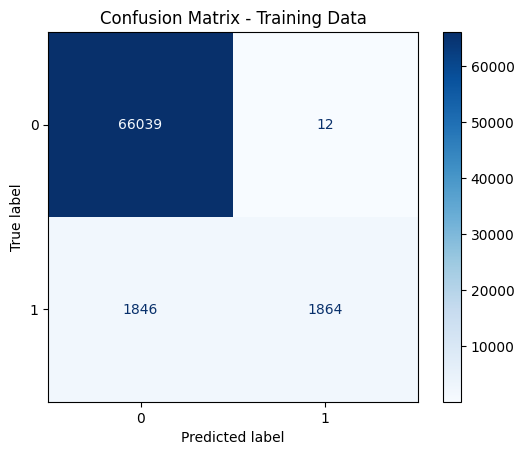

In [113]:
from sklearn.metrics import ConfusionMatrixDisplay 
# Confusion Matrix for Training Data
cm_train = confusion_matrix(Y_train, y_trin_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues')
plt.title("Confusion Matrix - Training Data")
plt.show()

# find the ***feature importances*** from **RandomForest**

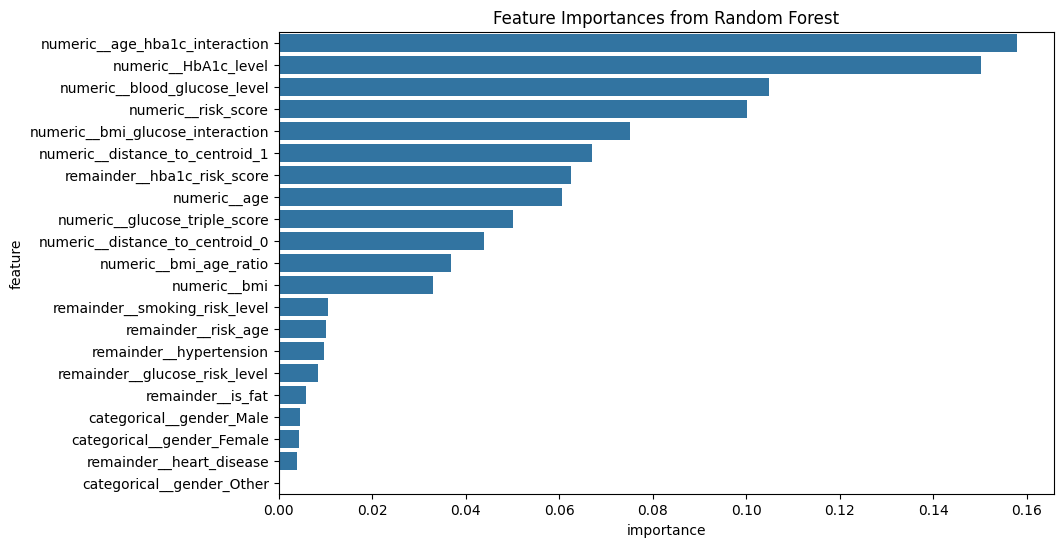

In [114]:
# Create and train pipeline with preprocessing and Random Forest model

model_for_feature_importance = Pipeline([
        ("preprocessor" , preprocessor) ,
        ( 'smote' , SMOTE(random_state=42)),
        ('RFC',  RandomForestClassifier(n_estimators=100, random_state=42))])


model_for_feature_importance.fit(X_train, Y_train)

# Extract feature importances from the Random Forest inside the pipeline
importances = model_for_feature_importance.named_steps['RFC'].feature_importances_
feature_names = model_for_feature_importance.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame to display and sort feature importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_df, x='importance', y='feature')
plt.title('Feature Importances from Random Forest')
plt.show()


# **save the model**

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Train Accuracy: 0.9733662074798239
fi score 0.6673827425707125
Precision: 0.9936034115138592
Recall: 0.5024258760107817
test score 0.971274582879422


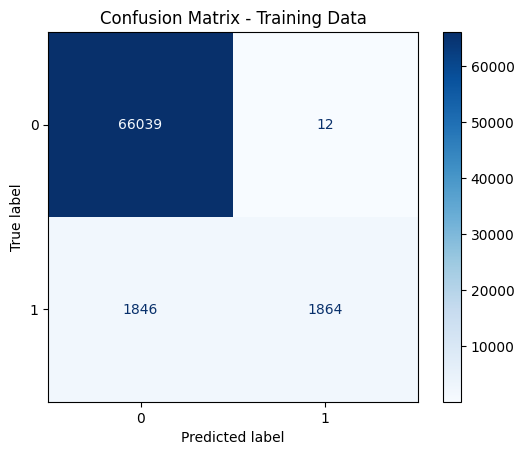

In [115]:
# Re-training the model on the full training data before saving.
# The previous training inside the cross-validation loop was only for performance evaluation (validation accuracy),
# and the model gets overwritten in each fold. This step ensures we save a final model trained on all available data.

Stacking_model.fit(X_train, Y_train)
y_trin_pred = Stacking_model.predict(X_train)
Train_Accuracy = accuracy_score(Y_train, y_trin_pred)
print(f"Train Accuracy: {Train_Accuracy}") 


train_f1 = f1_score(Y_train, y_trin_pred) 
print(f"fi score {train_f1}")


train_precision = precision_score(Y_train, y_trin_pred)
train_recall = recall_score(Y_train, y_trin_pred)


print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")


y_test_pred = Stacking_model.predict(X_test)
print(f"test score {accuracy_score(Y_test, y_test_pred)}")


from sklearn.metrics import ConfusionMatrixDisplay 
# Confusion Matrix for Training Data
cm_train = confusion_matrix(Y_train, y_trin_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues')
plt.title("Confusion Matrix - Training Data")
plt.show()

Train Accuracy: 0.9612104184286349
fi score 0.6417791898332009
Precision: 0.6305931321540063
Recall: 0.6533692722371968
test score 0.9693251533742331


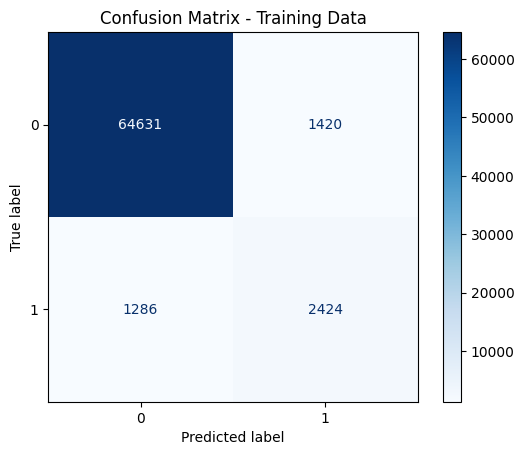

In [128]:
y_probs = Stacking_model.predict_proba(X_train)[:, 1]
threshold = 0.2
y_pred = (y_probs >= threshold).astype(int)


Train_Accuracy = accuracy_score(Y_train, y_pred)
print(f"Train Accuracy: {Train_Accuracy}") 


train_f1 = f1_score(Y_train, y_pred) 
print(f"fi score {train_f1}")


train_precision = precision_score(Y_train, y_pred)
train_recall = recall_score(Y_train, y_pred)


print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")



y_test_probs = Stacking_model.predict_proba(X_test)[:, 1]
threshold = 0.3
y_test_probs = (y_test_probs >= threshold).astype(int)
print(f"test score {accuracy_score(Y_test, y_test_probs)}")

from sklearn.metrics import ConfusionMatrixDisplay 
# Confusion Matrix for Training Data
cm_train = confusion_matrix(Y_train, y_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues')
plt.title("Confusion Matrix - Training Data")
plt.show()

Train Accuracy: 0.8978436657681941
fi score 0.8980908846464103
Precision: 0.8959227467811158
Recall: 0.9002695417789758


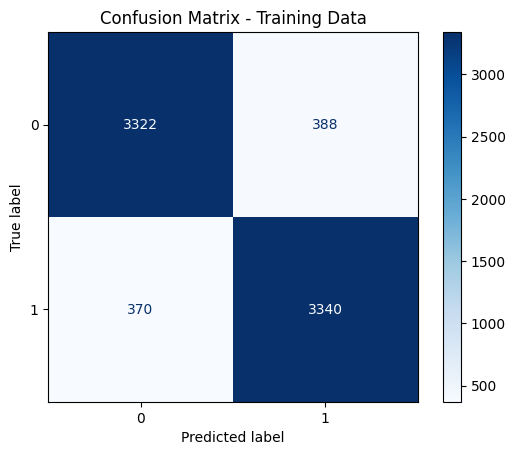

In [131]:
undersampler = RandomUnderSampler(random_state=42)

X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, Y_train)




y_probs = Stacking_model.predict_proba(X_train_resampled)[:, 1]
threshold = 0.1
y_pred = (y_probs >= threshold).astype(int)

Train_Accuracy = accuracy_score(y_train_resampled, y_pred)
print(f"Train Accuracy: {Train_Accuracy}") 

train_f1 = f1_score(y_train_resampled, y_pred) 
print(f"fi score {train_f1}")


train_precision = precision_score(y_train_resampled, y_pred)
train_recall = recall_score(y_train_resampled, y_pred)


print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")

from sklearn.metrics import ConfusionMatrixDisplay 
# Confusion Matrix for Training Data
cm_train = confusion_matrix(y_train_resampled, y_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues')
plt.title("Confusion Matrix - Training Data")
plt.show()

In [132]:
# the threshold = 0.3 

joblib.dump(Stacking_model, 'final_model.pkl')

['final_model.pkl']